# Data Understanding & Initial Exploration

## Project Context
This notebook focuses on the initial exploration and understanding of a telecom customer dataset.
The goal is to analyze customer behavior related to subscription plans, tenure, services, and churn,
in order to identify potential drivers of revenue leakage and customer attrition.

## Dataset Overview
- Each row represents a single customer
- The dataset contains demographic, service usage, contract, and billing information
- The target variable is **Churn**, indicating whether a customer left the service

## Objectives of This Notebook
- Understand the structure and size of the dataset
- Identify data types and key variables
- Detect potential data quality issues
- Prepare the ground for further SQL, Python, and Power BI analysis


In [1]:
import pandas as pd

df = pd.read_csv("../data/customer_churn_raw.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Dataset shape
df.shape


(7043, 21)

In [3]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Quality Checks

Before deeper analysis, we inspect the dataset for missing values, incorrect data types, and potential anomalies that may affect insights.


In [5]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Investigation of TotalCharges Data Type

Although no missing values are detected, the `TotalCharges` column is stored as an object instead of a numeric type.  
This suggests the presence of non-numeric values (e.g. empty strings) that may affect analysis.


In [6]:
df["TotalCharges"].head(10)


0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

In [7]:
# Check how many values cannot be converted to numeric
pd.to_numeric(df["TotalCharges"], errors="coerce").isnull().sum()


np.int64(11)

### Data Quality Issue: TotalCharges Column

Although no missing values were detected initially, the `TotalCharges` column is stored as an object type.
Upon further inspection, 11 values could not be converted to numeric format.

These values likely represent customers with zero tenure or missing billing records and must be handled before further analysis.


In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [9]:
df["TotalCharges"].dtype


dtype('float64')

In [10]:
df["TotalCharges"].isnull().sum()


np.int64(11)

In [11]:
df[df["TotalCharges"].isnull()][
    ["customerID", "tenure", "MonthlyCharges", "TotalCharges", "Churn"]
]


,customerID,tenure,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,52.55,NaN,No
753,3115-CZMZD,0,20.25,NaN,No
936,5709-LVOEQ,0,80.85,NaN,No
1082,4367-NUYAO,0,25.75,NaN,No
1340,1371-DWPAZ,0,56.05,NaN,No
3331,7644-OMVMY,0,19.85,NaN,No
3826,3213-VVOLG,0,25.35,NaN,No
4380,2520-SGTTA,0,20.00,NaN,No
5218,2923-ARZLG,0,19.70,NaN,No
6670,4075-WKNIU,0,73.35,NaN,No


### Investigation of Missing TotalCharges

Customers with missing `TotalCharges` values have a tenure of zero months.
This indicates that these customers recently joined the service and have not yet generated billing records.

These rows are valid and will be handled carefully during modeling and aggregation steps.


In [12]:
# Fix TotalCharges for new customers (tenure = 0)
df.loc[df["tenure"] == 0, "TotalCharges"] = 0


In [13]:
df["TotalCharges"].isnull().sum()


np.int64(0)

### Handling TotalCharges for New Customers

Customers with a tenure of zero months have not yet accumulated any billing history, which results in missing `TotalCharges` values.

These records represent newly acquired customers rather than data quality errors. To accurately reflect the absence of historical charges while preserving these customers for analysis, the missing `TotalCharges` values were set to **0**.

This approach ensures that early-stage customers remain included in churn and lifecycle analyses, while avoiding bias in revenue-based calculations.


### Churn Overview

The target variable `Churn` indicates whether a customer has left the service.
Understanding its distribution is essential before exploring drivers of churn and revenue leakage.


In [14]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Customer Tenure Distribution

Tenure represents the length of time (in months) a customer has been with the company.
Analyzing tenure helps distinguish between early churn and long-term retention behavior.


In [15]:
df["tenure"].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

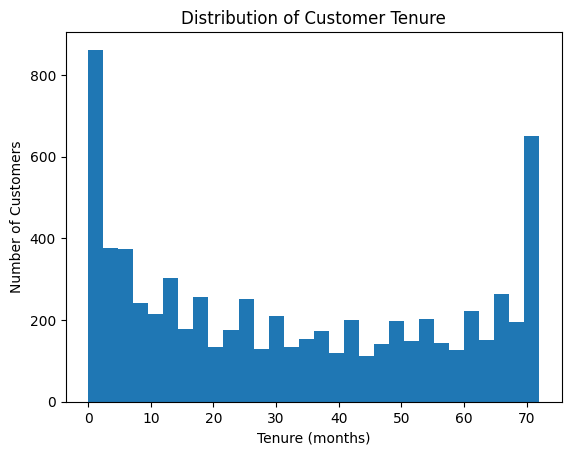

In [16]:
import matplotlib.pyplot as plt

plt.hist(df["tenure"], bins=30)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()


### Charges Overview

MonthlyCharges and TotalCharges provide insight into customer value and billing behavior.
Understanding their distributions helps identify pricing patterns and potential revenue risks.


In [17]:
df[["MonthlyCharges", "TotalCharges"]].describe()


,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.734304
std,30.090047,2266.794470
min,18.250000,0.000000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


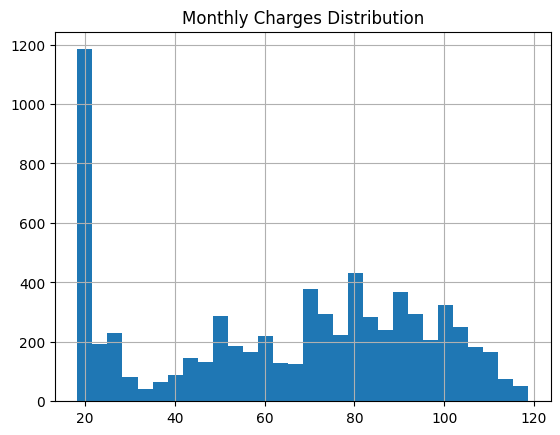

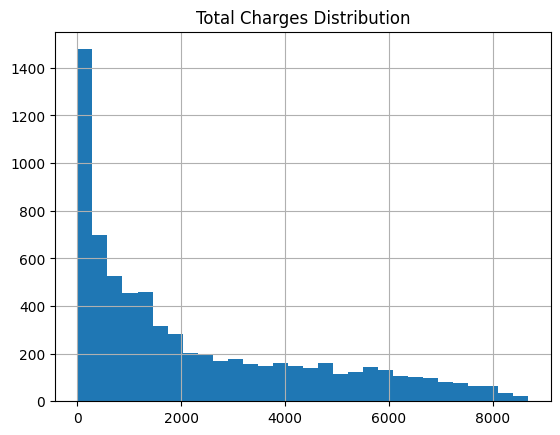

In [18]:
df["MonthlyCharges"].hist(bins=30)
plt.title("Monthly Charges Distribution")
plt.show()

df["TotalCharges"].hist(bins=30)
plt.title("Total Charges Distribution")
plt.show()


### Churn vs Tenure

Comparing tenure between churned and retained customers highlights whether churn is concentrated among newer customers.


In [19]:
df.groupby("Churn")["tenure"].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


### Churn vs Tenure — Key Findings

Customers who churn tend to have significantly shorter tenures compared to retained customers.

- The median tenure for churned customers is 10 months, compared to 38 months for retained customers.
- 75% of churned customers have a tenure of 29 months or less, while retained customers reach 61 months at the same percentile.
- The average tenure of churned customers (~18 months) is less than half that of retained customers (~38 months).

These results indicate that churn is heavily concentrated among newer customers, suggesting that the early stages of the customer lifecycle represent a critical risk period.

Improving onboarding, early engagement, and initial pricing or contract incentives may therefore have a strong impact on reducing churn.


## Churn Distribution

Before analyzing churn drivers, we first examine the overall distribution of churned versus retained customers to understand the scale of the problem.


In [20]:
df["Churn"].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

## Churn by Contract Type

Contract duration often reflects customer commitment and switching costs. We analyze churn rates across different contract types to assess their impact on customer retention.


In [21]:
df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack() * 100


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


## Monthly Charges and Churn

Pricing can influence churn when customers perceive insufficient value. We compare monthly charges between churned and retained customers to detect potential pricing sensitivity.


In [22]:
df.groupby("Churn")["MonthlyCharges"].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


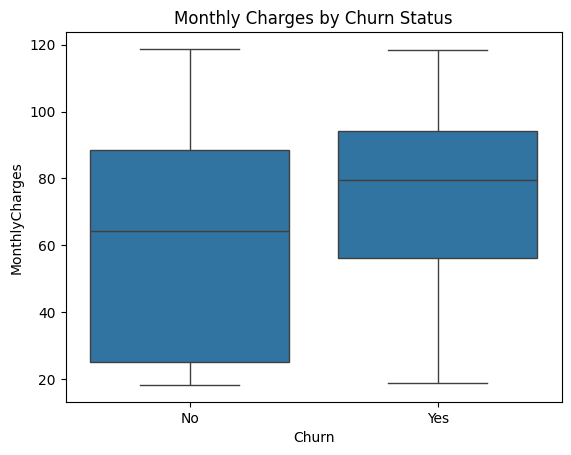

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn Status")
plt.show()


## Monthly Charges and Churn — Key Findings

Churned customers exhibit consistently higher monthly charges compared to retained customers.

- The average monthly charge for churned customers (~74) is significantly higher than that of retained customers (~61).
- The median monthly charge is also higher among churned customers, indicating a consistent pricing difference rather than a few extreme cases.
- The distribution shows that higher-priced plans are more heavily represented among churned customers.

These findings suggest that pricing sensitivity plays an important role in customer churn. Customers paying higher monthly fees may be more likely to leave if perceived value does not align with cost.

This highlights the importance of aligning pricing strategies with customer expectations, particularly for customers early in their lifecycle.


In [24]:
df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack() * 100


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [25]:
df.groupby("PaymentMethod")["Churn"].value_counts(normalize=True).unstack() * 100


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


In [26]:
df.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack() * 100


Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


In [27]:
df.groupby("TechSupport")["Churn"].value_counts(normalize=True).unstack() * 100


Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


In [28]:
df.groupby("OnlineSecurity")["Churn"].value_counts(normalize=True).unstack() * 100


Churn,No,Yes
OnlineSecurity,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


### Service Features and Churn — Key Findings

Churn rates are significantly higher among customers who lack core value-added services.

Customers using fiber optic internet exhibit the highest churn rates, indicating that premium service tiers are more sensitive to pricing and service experience.

The absence of technical support and online security is strongly associated with increased churn, with customers lacking these services churning at nearly three times the rate of those who have them.

These findings suggest that service quality, perceived protection, and post-sale support play a critical role in retaining high-value customers. Enhancing service adoption and bundling support features with premium plans may significantly reduce churn.
